In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function to compute the numerical gradient of function f at a point (x, y)
def numerical_gradient(f, point, h=1e-4):
    grad = np.zeros_like(point)
    for i in range(len(point)):
        point_minus = np.copy(point)
        point_plus = np.copy(point)
        point_minus[i] -= h
        point_plus[i] += h
        grad[i] = (f(point_plus) - f(point_minus)) / (2 * h)
    return grad

In [3]:
# Function to perform gradient descent on function f
def gradient_descent(f, start_point, learning_rate=0.1, num_steps=100):
    point = start_point.copy()
    history = [point.copy()]

    for _ in range(num_steps):
        grad = numerical_gradient(f, point)
        point -= learning_rate * grad
        history.append(point.copy())

    return point, history


In [4]:
# Define the target function and the starting point
f = lambda p: p[0]**2 + p[1]**2
start_point = np.array([10.0, 10.0])

# Compute the gradient at the starting point
print("Gradient at (x, y) =", start_point, ":", numerical_gradient(f, start_point))

final_point, history = gradient_descent(f, start_point, learning_rate=0.1, num_steps=50)

print("Final point (x, y):", np.round(final_point, 4))


Gradient at (x, y) = [10. 10.] : [20. 20.]
Final point (x, y): [0.0001 0.0001]


In [5]:
# Extended plot function that plots the gradient descent trajectory and the optimum

def plot_function_3d(f, x_range=(-5, 5), y_range=(-5, 5), num_points=400, history=None, optimum=None):
    x_vals = np.linspace(x_range[0], x_range[1], num_points)
    y_vals = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(x_vals, y_vals)

    f_vec = np.vectorize(lambda x, y: f(np.array([x, y])))
    Z = f_vec(X, Y)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("f(x, y)")
    ax.set_title("3D Plot of f(x, y)")
    fig.colorbar(surface, shrink=0.5, aspect=5)

    if history is not None:
        history = np.array(history)
        xs = history[:, 0]
        ys = history[:, 1]
        zs = np.array([f(np.array([x, y])) for x, y in zip(xs, ys)])
        ax.scatter(xs, ys, zs, color='red', marker='o', s=50, label='Gradient Descent')
        ax.plot(xs, ys, zs, color='red', linewidth=2)

    if optimum is not None:
        opt_x = optimum[0]
        opt_y = optimum[1]
        opt_z = f(np.array([opt_x, opt_y]))
        ax.scatter([opt_x], [opt_y], [opt_z], color='blue', marker='o', s=50, label='Optimum')

    ax.legend()
    plt.show()


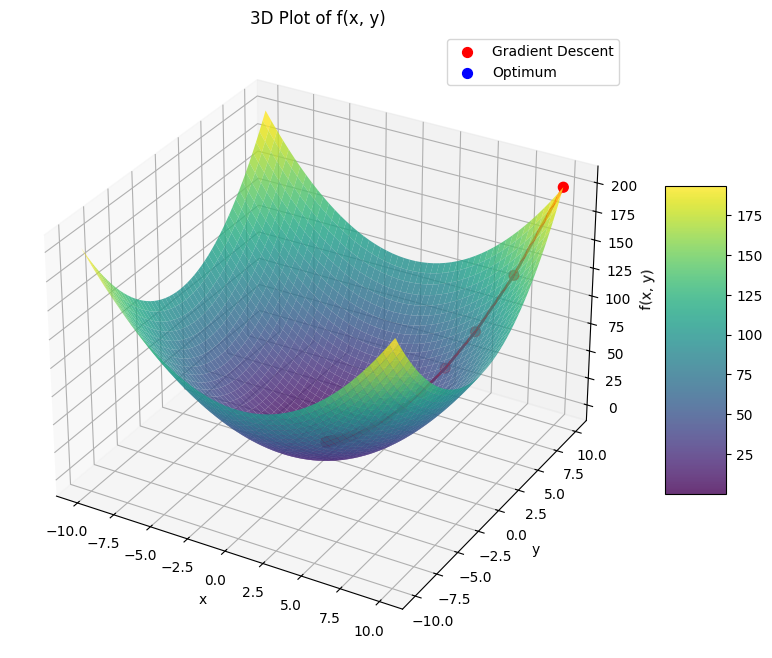

In [6]:
# Plot the function and the gradient descent result
plot_function_3d(f, x_range=(-10, 10), y_range=(-10, 10), history=history, optimum=final_point)
